In [7]:
%matplotlib inline
import numpy as np
from keras.applications import vgg16, inception_v3, ResNet50, mobilenet # 철자 달라졌음 resnet50 아님!
from keras.utils import load_img
from keras.utils import img_to_array
import matplotlib.pyplot as plt


In [8]:
vgg_model = vgg16.VGG16(weights='imagenet')

2023-02-23 15:11:43.132796: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-23 15:11:43.132826: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-23 15:11:43.132850: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (master): /proc/driver/nvidia/version does not exist


553467096/553467096 [==============================] - 50s 0us/step


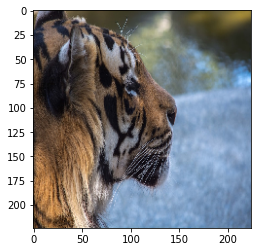

In [10]:
filename = 'pic.jpg'
org = load_img(filename, target_size=(224, 224)) # 224로 지정하는 이유는 vgg16에서 쓰기 위함
img = img_to_array(org)
plt.imshow(np.uint8(img))

In [14]:
# img.shape # (224, 224, 3)

x = np.expand_dims(img, axis=0) 
# x.shape # (1, 224, 224, 3)


(1, 224, 224, 3)

In [16]:
x = vgg16.preprocess_input(x)
pred = vgg_model.predict(x)

# print(pred)



1/1 [==============================] - 1s 616ms/step


In [17]:
from keras.applications.imagenet_utils import decode_predictions
label = decode_predictions(pred)
print(label)

35363/35363 [==============================] - 0s 0us/step
[[('n02129604', 'tiger', 0.5873772), ('n02109047', 'Great_Dane', 0.0990513), ('n02108089', 'boxer', 0.09011535), ('n02108422', 'bull_mastiff', 0.03754028), ('n02128925', 'jaguar', 0.035474762)]]


In [21]:
vgg_model.summary()
# transfer learning - fine tuning
# 1. layer -> not trainable

# for layer in vgg_model.layers:
#     layer.trainable = False

# 2. bottle neck feature



Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [20]:


vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     